## Questão 01

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

import sklearn
from sklearn import datasets, linear_model, metrics
import numpy as np

## Questão 02

In [2]:
X, y = datasets.load_diabetes(return_X_y=True)

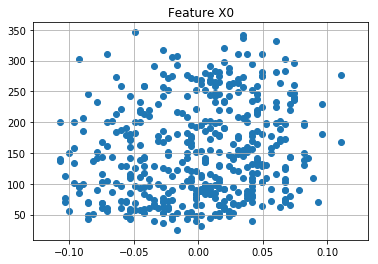

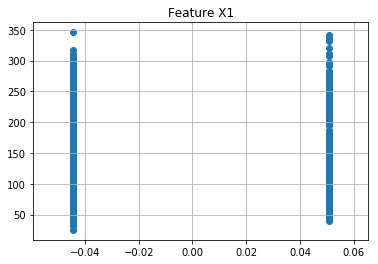

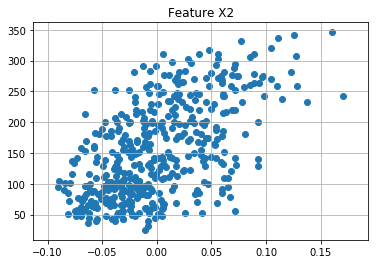

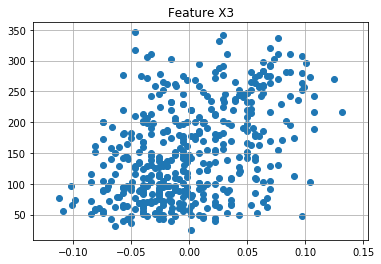

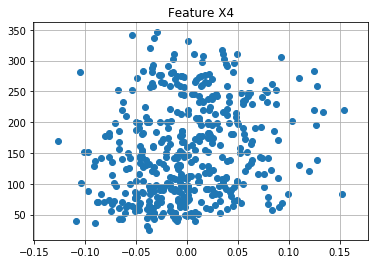

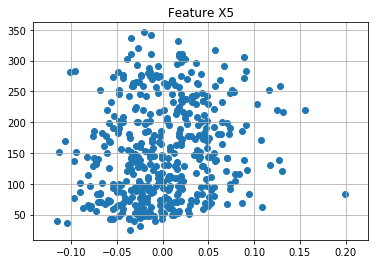

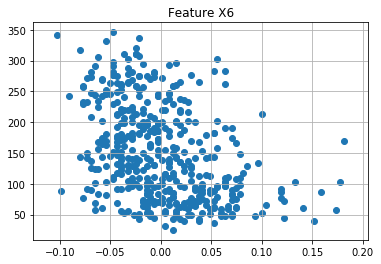

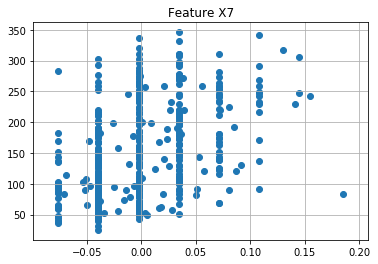

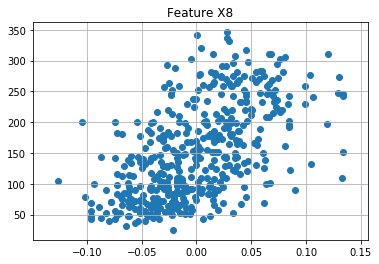

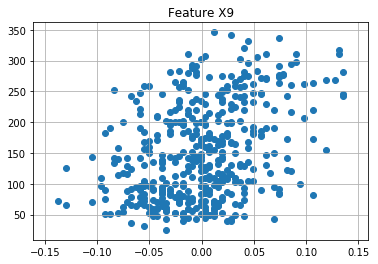

In [3]:
col = []
for i in range(0, len(X[0])) : #Percorrendo as colunas
    for j in range(0, len(X)) : #Percorrendo cada linha da estrutura
        col.append(X[j][i])
    plt.figure(i)
    plt.title("Feature X" + str(i))
    plt.grid()
    plt.scatter(col, y)
    del col[:]

#### A) Qual feature melhor se ajusta a uma função linear? Por que?
A feature X8 pois os dados estão crescentes e estão menos dispersos.

#### B) Qual feature pior se ajusta a uma função linear? Por que?
A feature X1, pois há muitos dados iguais e isso causa relações diferentes em Y.


## Questão 03

In [4]:
col = []
for i in range(0, len(X[0])) : #Percorrendo as colunas
    for j in range(0, len(X)) : #Percorrendo cada linha da estrutura
        col.append(X[j][i])
    print("Correlação: " + "X" + str(i))
    print(np.corrcoef(col, y)[0, 1])
    print('____________________')
    del col[:]

Correlação: X0
0.18788875071891983
____________________
Correlação: X1
0.04306199845160538
____________________
Correlação: X2
0.5864501344746886
____________________
Correlação: X3
0.44148384893088616
____________________
Correlação: X4
0.2120224810145507
____________________
Correlação: X5
0.17405358696874246
____________________
Correlação: X6
-0.39478925067091836
____________________
Correlação: X7
0.43045288474477306
____________________
Correlação: X8
0.5658834252428098
____________________
Correlação: X9
0.38248348424858103
____________________


## Questão 04

In [5]:
model = linear_model.LinearRegression()

In [6]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Questão 05

#### B0

In [7]:
b0 = model.intercept_
b0

152.1334841628965

#### B1

In [8]:
b1= model.coef_
b1

array([ -10.01219782, -239.81908937,  519.83978679,  324.39042769,
       -792.18416163,  476.74583782,  101.04457032,  177.06417623,
        751.27932109,   67.62538639])

#### Fórmula

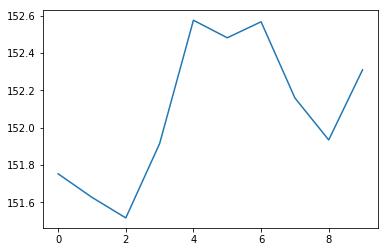

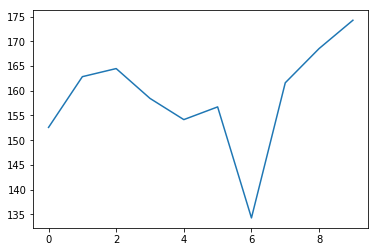

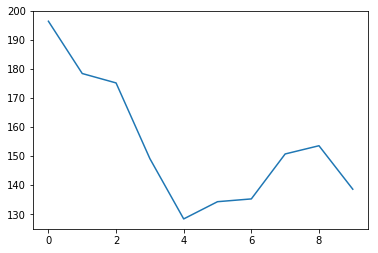

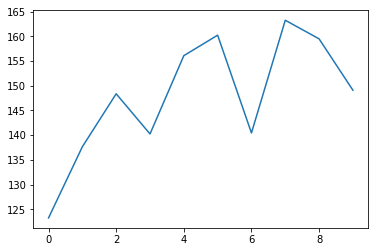

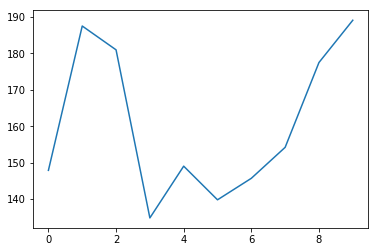

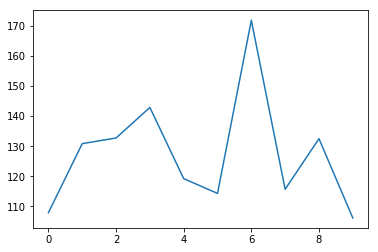

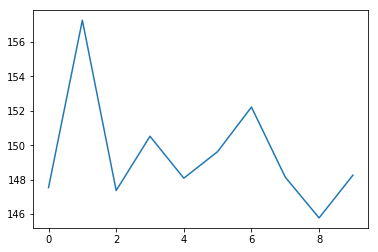

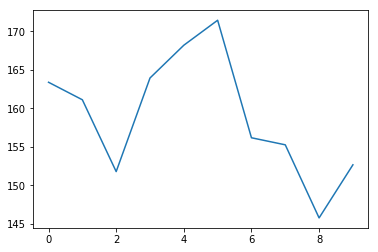

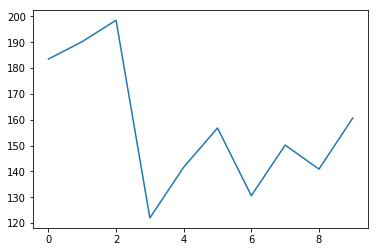

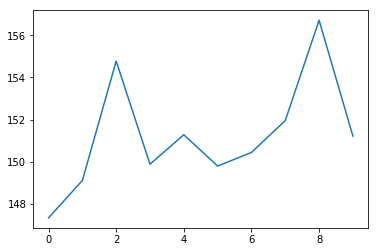

In [9]:
for i in range (0, X.shape[1]) :
    f = b1[i] * X[i] + b0
    plt.plot(f)
    plt.show()

## Questão 06

In [10]:
y_pred = model.predict(X)
y_pred

array([206.11706979,  68.07234761, 176.88406035, 166.91796559,
       128.45984241, 106.34908972,  73.89417947, 118.85378669,
       158.81033076, 213.58408893,  97.07853583,  95.1016223 ,
       115.06673301, 164.67605023, 103.07517946, 177.17236996,
       211.75953205, 182.84424343, 147.99987605, 124.01702527,
       120.33094632,  85.80377894, 113.11286302, 252.44934852,
       165.48821056, 147.72187623,  97.12824075, 179.09342974,
       129.05497324, 184.78138552, 158.71515746,  69.47588393,
       261.50255826, 112.81897436,  78.37194762,  87.66624129,
       207.92460213, 157.87686037, 240.84370686, 136.93372685,
       153.48187659,  74.15703284, 145.63105805,  77.8280105 ,
       221.0786645 , 125.22224022, 142.60147066, 109.4926324 ,
        73.14037106, 189.87368742, 157.93636782, 169.55816531,
       134.18186217, 157.72356219, 139.1077439 ,  72.73252701,
       207.8289973 ,  80.10834588, 104.08562488, 134.57807971,
       114.23779529, 180.67760064,  61.12644508,  98.72

## Questão 07

### Cálculo usando scikit learn

In [11]:
mse = metrics.mean_squared_error(y,y_pred)
mse

2859.6903987680657

### Cálculo usando Python

In [12]:
mse_bracal = sum((y - y_pred) ** 2) / len(y)
mse_bracal

2859.6903987680653

## Questão 08 - Modelo para melhor Feature

In [13]:
X8 = []
for i in range(0,len(X)) :
    item = [X[i][8]]
    X8.append(item)

In [14]:
mX8 = linear_model.LinearRegression()
mX8.fit(X8, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
y_ = [[i] for i in y]

#### B1 - Braçal

In [16]:
print("Tamanho de " + str(len(X8)) + " linhas")

y_predX8  = mX8.predict(X8)
b1 = np.sum((X8 - np.mean(X8)) * (y_ - np.mean(y_))) / np.sum((X8 - np.mean(X8)) ** 2)
print("Coeficiente ----> " + str(b1))

Tamanho de 442 linhas
Coeficiente ----> 916.1387228150982


#### B0 - Braçal

In [17]:
b0 = np.mean(y_predX8) - b1 * np.mean(X8)

print ("Coeficiente ----> " + str(b0))

Coeficiente ----> 152.13348416289622


#### B1 - Molezinha

In [18]:
print("Coeficiente ---->" + str(mX8.coef_)+"\n")

Coeficiente ---->[916.13872282]



#### B0 - Molezinha

In [19]:
print("Coeficiente ---> " + str(mX8.intercept_)+"\n")

Coeficiente ---> 152.13348416289628



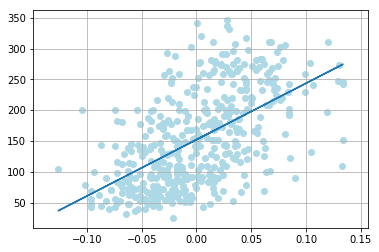

In [20]:
plt.grid()
plt.scatter(X8, y, color='lightblue')
plt.plot(X8, y_predX8)

#### MSE

In [21]:
mseX8 = metrics.mean_squared_error(y, y_predX8)
print (mseX8)

4030.9931334683297


## Questão 09 - Modelo para pior Feature

In [22]:
X1 = []
for i in range(0, len(X)):
    item2 = [X[i][1]]
    X1.append(item2)

In [23]:
mX1 = linear_model.LinearRegression()
mX1.fit(X1,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### B1X1

In [24]:
#print("Tamanho de " + str(len(X1)) + " linhas")
 
print("Coeficiente ---> " + str(mX1.coef_)+"\n")

Coeficiente ---> [69.71535568]



#### B0X1

In [25]:
print("Coeficiente ---> " + str(mX1.intercept_)+"\n")

Coeficiente ---> 152.13348416289594



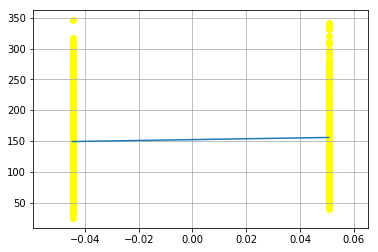

In [26]:
y_predX1 = mX1.predict(X1)
plt.grid()
plt.scatter(X1, y, color='yellow')
plt.plot(X1, y_predX1)

#### MSE

In [27]:
mseX2 =  metrics.mean_squared_error(y, y_predX1)
print(mseX2)

5918.888899586022
